<a href="https://colab.research.google.com/github/np02cs4a240117-art/AI/blob/master/2514120_AmitGangai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#**5CS037-Concepts and Technologies of AI**


#***Assignment I - HDI Data Analysis***
---
#*Name: Amit Gangai*
#*Student ID: 2514120*
#*Group: L4CG4*
......................................................................................................................................................................................................................................................

#=============================

#*STEP 0: Libraries & Dataset Load*

#=============================

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df = pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv", encoding='latin-1')


In [66]:
df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


#===================

#*STEP 1: COLUMN NAME*

#===================

In [67]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)


In [68]:
print(df.columns.tolist())


['unnamed:_0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']


#=========================

#*STEP 2: NUMERIC CONVERSION*

#=========================

In [69]:
numeric_cols = [
    'hdi',
    'gross_inc_percap',
    'life_expectancy',
    'gender_development'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


#===============

#*STEP 3: CLEANING*

#===============

In [70]:
df = df.drop_duplicates()


In [71]:
df = df.dropna(subset=['country', 'year', 'hdi'])


#=======================================

#*PROBLEM 1A — Single Year HDI Exploration (2022)*

#=======================================

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1: 2022 data

In [73]:
hdi_2022 = df[df['year'] == 2022].copy()

# Task 2: Basic exploration

In [74]:
print("\nFirst 10 rows:")
print(hdi_2022.head(10))

print("\nRows and columns in 2022 data:", hdi_2022.shape)

print("\nColumn names and types:")
print(hdi_2022.dtypes)


First 10 rows:
     unnamed:_0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...               0.622  

# Task 3: Cleaning the data

##*- Important numeric columns*

In [75]:
important_columns = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']

##*- Make numeric columns proper numbers*

In [76]:
for col in important_columns:
    if col in hdi_2022.columns:
        hdi_2022[col] = pd.to_numeric(hdi_2022[col], errors='coerce')

##*- Missing value*

In [77]:
print("\nMissing values count:")
print(hdi_2022[important_columns].isnull().sum())


Missing values count:
hdi                    0
life_expectancy        0
gross_inc_percap       0
gender_development    11
dtype: int64


##*- Remove duplicates rows*

In [78]:
hdi_2022 = hdi_2022.drop_duplicates()

##*- Drop rows where hdi or country is missing*

In [79]:
hdi_2022 = hdi_2022.dropna(subset=['hdi', 'country'])
print("Cleaning complete. Final rows:", len(hdi_2022))

Cleaning complete. Final rows: 204


# Task 4: Basic statistics

In [80]:
mean_hdi = hdi_2022['hdi'].mean()
median_hdi = hdi_2022['hdi'].median()
std_hdi = hdi_2022['hdi'].std()

print("\n2022 HDI Statistics:")
print("Mean:", round(mean_hdi, 3))
print("Median:", round(median_hdi, 3))
print("Standard Deviation:", round(std_hdi, 3))


2022 HDI Statistics:
Mean: 0.723
Median: 0.74
Standard Deviation: 0.153


##*- Find highest and lowest HDI countries*

In [81]:
max_row = hdi_2022[hdi_2022['hdi'] == hdi_2022['hdi'].max()]
min_row = hdi_2022[hdi_2022['hdi'] == hdi_2022['hdi'].min()]

print("Highest HDI country:", max_row['country'].values[0])
print("Lowest HDI country:", min_row['country'].values[0])

Highest HDI country: Switzerland
Lowest HDI country: Somalia


# Task 5: Filter and sort

In [82]:
very_high_hdi = hdi_2022[hdi_2022['hdi'] > 0.800]
very_high_hdi = very_high_hdi.sort_values('gross_inc_percap', ascending=False)

print("\nTop 10 countries (HDI > 0.8, sorted by GNI):")
print(very_high_hdi[['country', 'hdi', 'gross_inc_percap']].head(10))


Top 10 countries (HDI > 0.8, sorted by GNI):
                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


# Task 6: Add HDI Category column

In [83]:
def categorize_hdi(value):
    if value < 0.550:
        return "Low"
    elif value < 0.700:
        return "Medium"
    elif value < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022['hdi_category'] = hdi_2022['hdi'].apply(categorize_hdi)

print("\nCategory counts:")
print(hdi_2022['hdi_category'].value_counts())


Category counts:
hdi_category
Very High    71
High         54
Medium       44
Low          35
Name: count, dtype: int64


##*Save final dataframe*

In [84]:
hdi_2022.to_csv('HDI_category_added.csv', index=False)
print("File saved: HDI_category_added.csv")

File saved: HDI_category_added.csv


#======================================

#*PROBLEM 1B — HDI Trend Analysis (2020–2022)*

#======================================

# Task 1: Filter 2020-2022 data

In [85]:
years_data = df[df['year'].isin([2020, 2021, 2022])].copy()
years_data.to_csv('HDI_problem1B.csv', index=False)
print("Saved HDI_problem1B.csv")

Saved HDI_problem1B.csv


# Task 2: Cleaning

In [86]:
for col in important_columns:
    if col in years_data.columns:
        years_data[col] = pd.to_numeric(years_data[col], errors='coerce')

years_data = years_data.drop_duplicates()
years_data = years_data.dropna(subset=['hdi', 'country', 'year'])


# Task 3 (A): Line chart for 5 countries

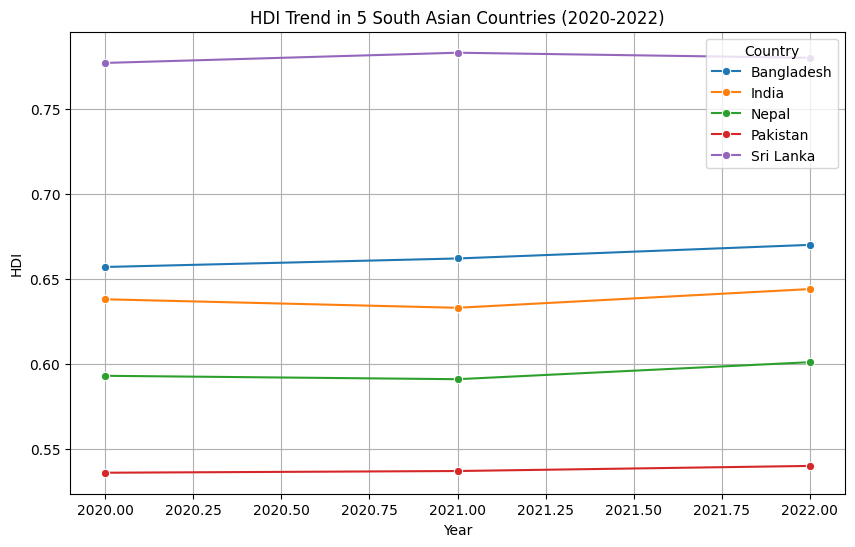

In [87]:
my_countries = ['Nepal', 'India', 'Bangladesh', 'Pakistan', 'Sri Lanka']
trend_data = years_data[years_data['country'].isin(my_countries)]

plt.figure(figsize=(10,6))
sns.lineplot(data=trend_data, x='year', y='hdi', hue='country', marker='o')
plt.title('HDI Trend in 5 South Asian Countries (2020-2022)')
plt.xlabel('Year')
# plt.xticks(trend_data['year'].unique())
plt.ylabel('HDI')
plt.legend(title='Country')
plt.grid()
plt.show()

# Task 3 (B): Average HDI by Region (2020-2022)

##*- Bar Chart*

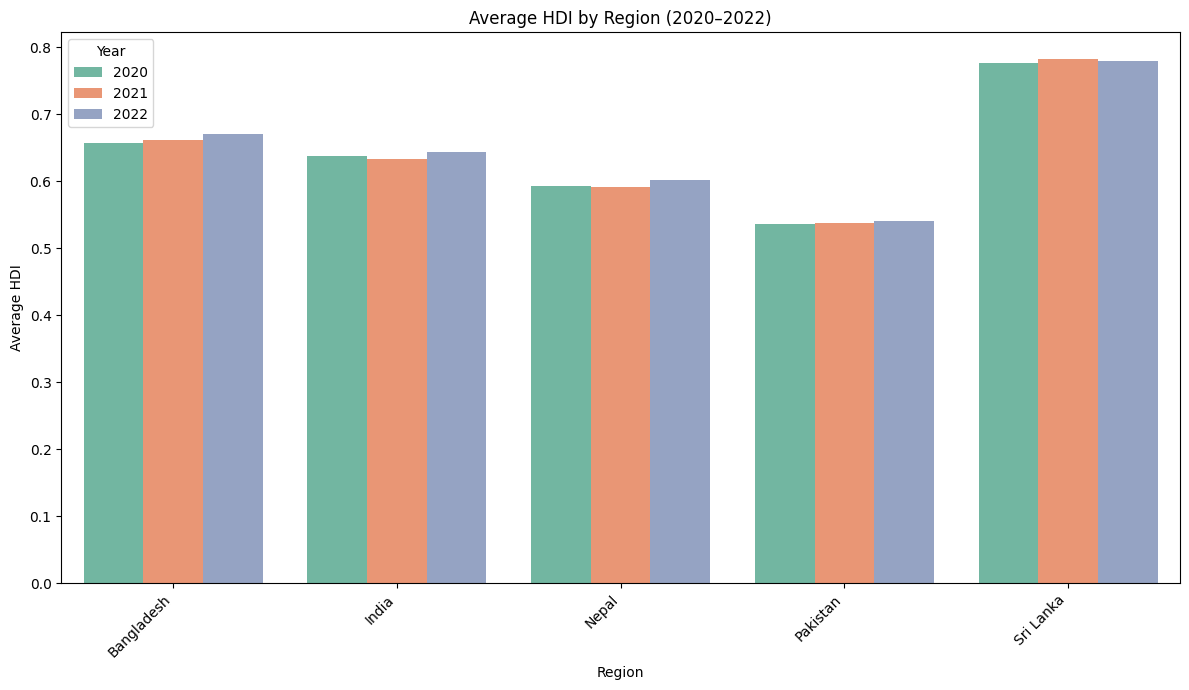

In [88]:
# Step 1: Keep only the rows that belong to these big regions
# Define 'regions' - it was undefined. Using 'my_countries' as an example.
regions = my_countries

region = years_data[years_data['country'].isin(regions)]

# Step 2: Calculate the average HDI for each region and each year
region_avg = region.groupby(['country', 'year'])['hdi'].mean().reset_index()

# Step 3: Plot using the filtered data
plt.figure(figsize=(12, 7))
sns.barplot(data=region_avg, x='country', y='hdi', hue='year', palette='Set2')  # Fixed: removed trailing space

plt.title("Average HDI by Region (2020–2022)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

##*- Box plot*

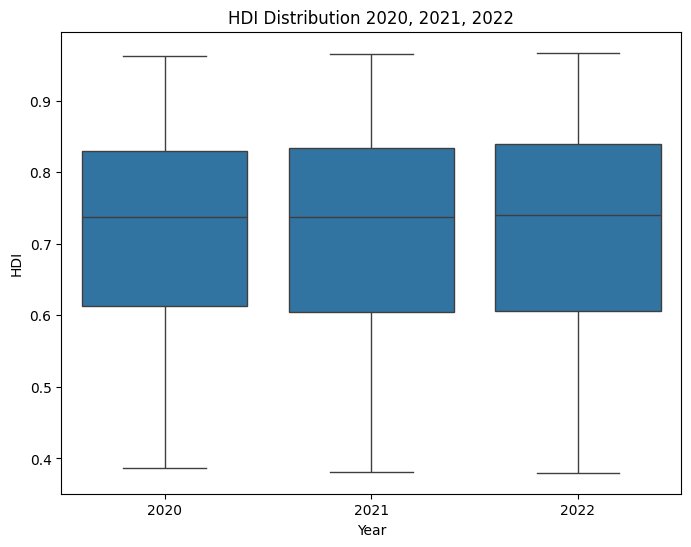

Observation: Median HDI increased in 2022 – possible recovery after COVID.


In [89]:
plt.figure(figsize=(8,6))
sns.boxplot(data=years_data, x='year', y='hdi')
plt.title('HDI Distribution 2020, 2021, 2022')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.show()
print("Observation: Median HDI increased in 2022 – possible recovery after COVID.")

##*- Scatter plot HDI vs GNI*

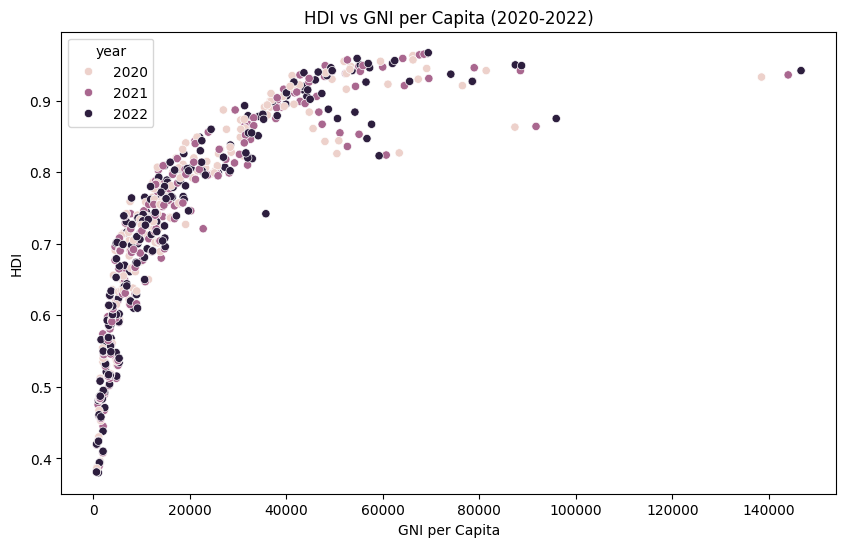

In [90]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=years_data, x='gross_inc_percap', y='hdi', hue='year')
plt.title('HDI vs GNI per Capita (2020-2022)')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.show()

# Task 4: Short questions

In [91]:
pivot = years_data.pivot_table(values='hdi', index='country', columns='year')
pivot['change_20_to_22'] = pivot[2022] - pivot[2020]

print("\nTop 5 improvement:")
print(pivot['change_20_to_22'].sort_values(ascending=False).head(5))

print("\nCountries with decline:")
print(pivot[pivot['change_20_to_22'] < 0]['change_20_to_22'])

print("\nCOVID discussion: Many countries saw HDI drop in 2020-2021 due to health and economic problems. Recovery started in 2022.")


Top 5 improvement:
country
Andorra       0.041
Azerbaijan    0.038
Ecuador       0.031
Maldives      0.025
Mexico        0.024
Name: change_20_to_22, dtype: float64

Countries with decline:
country
Afghanistan                        -0.026
Angola                             -0.003
Australia                          -0.002
Belize                             -0.005
Brunei Darussalam                  -0.004
Bulgaria                           -0.003
Burkina Faso                       -0.008
Central African Republic           -0.002
Chad                               -0.002
Comoros                            -0.002
Congo                              -0.005
Costa Rica                         -0.005
Egypt                              -0.001
Eswatini (Kingdom of)              -0.012
Gabon                              -0.011
Guatemala                          -0.009
Haiti                              -0.005
Jamaica                            -0.001
Jordan                             -0.004
Kaz

#================================

#*PROBLEM 2 — Advanced HDI Exploration*

#================================

# Task 1: Create South Asia subset and save CSV

In [92]:
south_asia_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India',
                        'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

##*- Filter the full dataset*

In [93]:
hdi_south_asia = df[df['country'].isin(south_asia_countries)].copy()

##*- Save as required*

In [94]:
hdi_south_asia.to_csv('HDI_SouthAsia.csv', index=False)
print("Saved HDI_SouthAsia.csv")
print("Total rows in South Asia data:", len(hdi_south_asia))

Saved HDI_SouthAsia.csv
Total rows in South Asia data: 239


##*- Cleaning*

In [95]:
important_columns = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in important_columns:
    if col in hdi_south_asia.columns:
        hdi_south_asia[col] = pd.to_numeric(hdi_south_asia[col], errors='coerce')

hdi_south_asia = hdi_south_asia.drop_duplicates()
hdi_south_asia = hdi_south_asia.dropna(subset=['hdi'])

##*- Use latest year 2022 for fair comparison*

In [96]:
sa_2022 = hdi_south_asia[hdi_south_asia['year'] == 2022].copy()

# Task 2: Composite Score

In [97]:
# Formula: 0.30 * life_expectancy + 0.30 * gross_inc_percap (note: values are indices or raw, use as is)
sa_2022['composite_score'] = 0.30 * sa_2022['life_expectancy'] + 0.30 * sa_2022['gross_inc_percap']

##*- Rank countries*

In [98]:
sa_ranked = sa_2022.sort_values('composite_score', ascending=False)

##*- Plot top 5 horizontal bar chart*

/tmp/ipython-input-3636887970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sa_ranked.head(5), x='composite_score', y='country', palette='viridis')


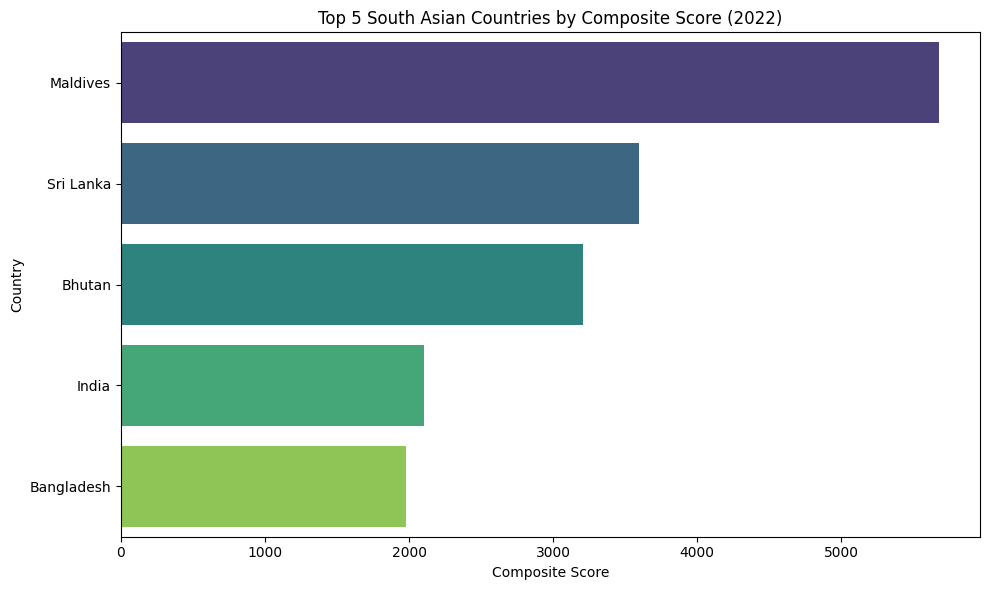

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sa_ranked.head(5), x='composite_score', y='country', palette='viridis')
plt.title('Top 5 South Asian Countries by Composite Score (2022)')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##*- Compare with HDI ranking*

In [100]:
print("Composite Score Ranking (Top 5):")
print(sa_ranked[['country', 'composite_score']].head(5))

print("\nHDI Ranking (Top 5):")
print(sa_2022.sort_values('hdi', ascending=False)[['country', 'hdi']].head(5))

print("Discussion: Composite ignores education, so countries with high income/health rank higher than pure HDI.")

Composite Score Ranking (Top 5):
         country  composite_score
3530    Maldives      5678.289357
5477   Sri Lanka      3592.832541
659       Bhutan      3209.130864
2573       India      2105.481239
461   Bangladesh      1975.446053

HDI Ranking (Top 5):
         country    hdi
5477   Sri Lanka  0.780
3530    Maldives  0.762
659       Bhutan  0.681
461   Bangladesh  0.670
2573       India  0.644
Discussion: Composite ignores education, so countries with high income/health rank higher than pure HDI.


# Task 3: Outlier Detection (IQR method)

In [101]:
outlier_countries = []
for col in ['hdi', 'gross_inc_percap']:
    Q1 = sa_2022[col].quantile(0.25)
    Q3 = sa_2022[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = sa_2022[(sa_2022[col] < lower) | (sa_2022[col] > upper)]
    if not outliers.empty:
        print(f"Outliers in {col}: {outliers['country'].tolist()}")
        outlier_countries.extend(outliers['country'].tolist())

outlier_countries = list(set(outlier_countries))

##*- Scatter plot with outliers highlighted*

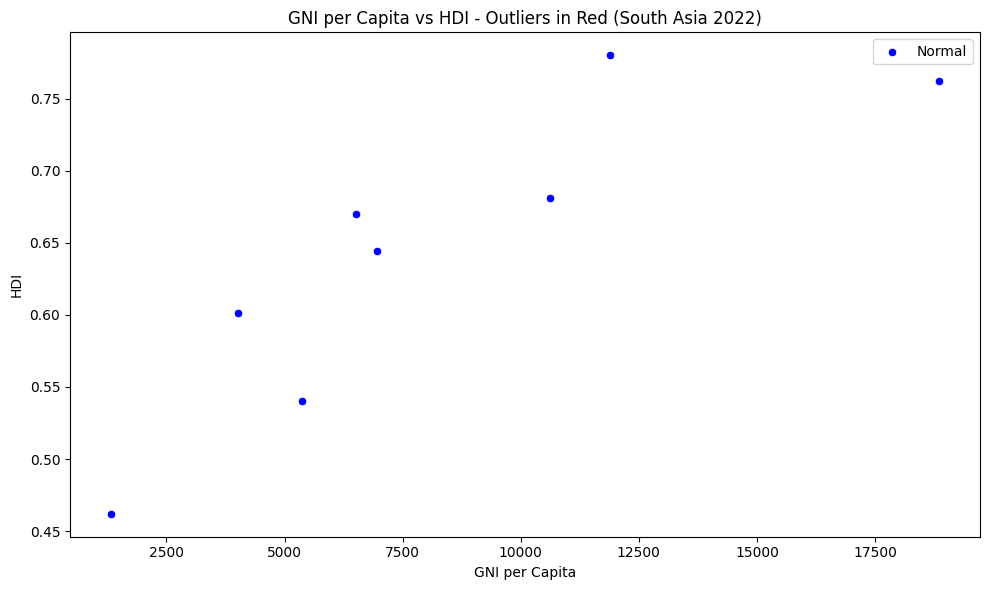

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sa_2022, x='gross_inc_percap', y='hdi', color='blue', label='Normal')
if outlier_countries:
    sns.scatterplot(data=sa_2022[sa_2022['country'].isin(outlier_countries)],
                    x='gross_inc_percap', y='hdi', color='red', label='Outlier', s=100)
plt.title('GNI per Capita vs HDI - Outliers in Red (South Asia 2022)')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.legend()
plt.tight_layout()
plt.show()

# Task 4: Metric Relationships (correlation and scatter)

Correlation between HDI and gender_development: 0.885


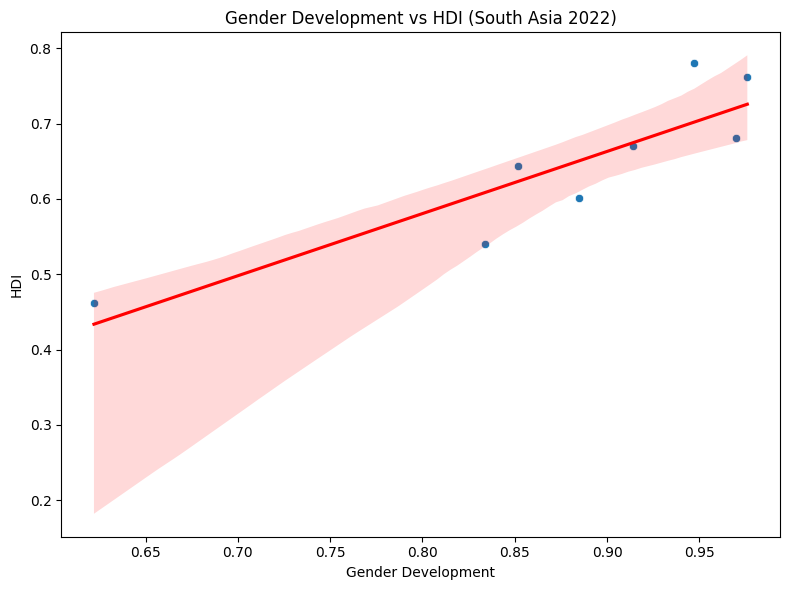

Correlation between HDI and life_expectancy: 0.928


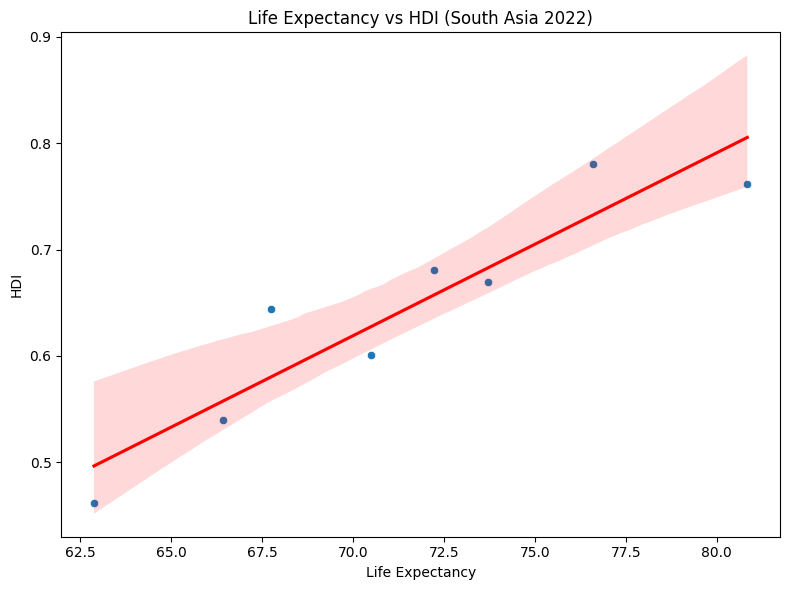

Life expectancy usually has stronger correlation with HDI.


In [103]:
metrics = ['gender_development', 'life_expectancy']
for metric in metrics:
    if metric in sa_2022.columns:
        corr = sa_2022['hdi'].corr(sa_2022[metric])
        print(f"Correlation between HDI and {metric}: {corr:.3f}")

        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=sa_2022, x=metric, y='hdi')
        sns.regplot(data=sa_2022, x=metric, y='hdi', scatter=False, color='red')
        plt.title(f'{metric.replace("_", " ").title()} vs HDI (South Asia 2022)')
        plt.xlabel(metric.replace("_", " ").title())
        plt.ylabel('HDI')
        plt.tight_layout()
        plt.show()

print("Life expectancy usually has stronger correlation with HDI.")

# Task 5: Gap Analysis

In [104]:
sa_2022['gni_hdi_gap'] = sa_2022['gross_inc_percap'] - sa_2022['hdi']

##*- Top 3 positive and negative gaps*

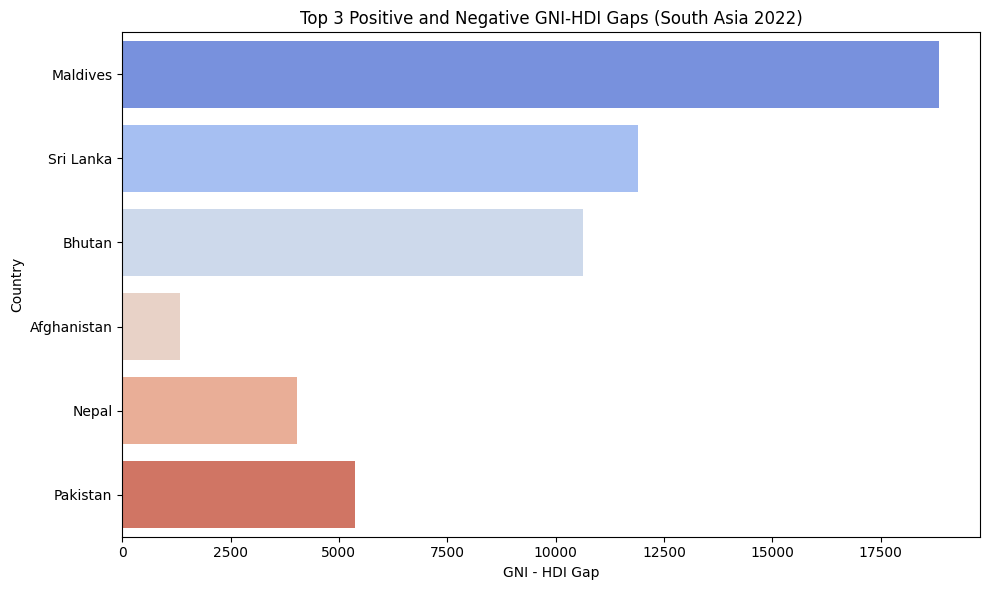

Positive gap means high income but lower HDI (possible inequality).


In [105]:
positive_gap = sa_2022.sort_values('gni_hdi_gap', ascending=False).head(3)
negative_gap = sa_2022.sort_values('gni_hdi_gap').head(3)

gap_data = pd.concat([positive_gap, negative_gap])

plt.figure(figsize=(10, 6))
sns.barplot(
    data=gap_data,
    x='gni_hdi_gap',
    y='country',
    hue='country',
    palette='coolwarm',
    legend=False
)
plt.title('Top 3 Positive and Negative GNI-HDI Gaps (South Asia 2022)')
plt.xlabel('GNI - HDI Gap')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print("Positive gap means high income but lower HDI (possible inequality).")

#====================================

#*PROBLEM 3 — Comparative Regional Analysis*

#====================================


# Task 1: Country lists

In [106]:
south_asia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
middle_east = ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon',
               'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen']

# Task 2: Filter data for both regions using the existing years_data

In [107]:
sa_data = years_data[years_data['country'].isin(south_asia)].copy()
me_data = years_data[years_data['country'].isin(middle_east)].copy()

##*- Save CSVs*

In [108]:
sa_data.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
me_data.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)
print("Saved both regional files!")

Saved both regional files!


##*- Add region label*

In [109]:
sa_data['region'] = 'South Asia'
me_data['region'] = 'Middle East'

##*- Combine for combined analysis*

In [110]:
combined = pd.concat([sa_data, me_data], ignore_index=True)

# Task 3: Average and standard deviation of HDI

In [111]:
print("\nHDI Average (2020-2022):")
print("South Asia:", round(sa_data['hdi'].mean(), 3))
print("Middle East:", round(me_data['hdi'].mean(), 3))

print("\nHDI Standard Deviation:")
print("South Asia:", round(sa_data['hdi'].std(), 3))
print("Middle East:", round(me_data['hdi'].std(), 3))


HDI Average (2020-2022):
South Asia: 0.64
Middle East: 0.789

HDI Standard Deviation:
South Asia: 0.098
Middle East: 0.141


##*- Which region has higher average HDI?*

In [112]:
if not me_data.empty and me_data['hdi'].mean() > sa_data['hdi'].mean():
    print("Middle East has higher average HDI.")
elif not sa_data.empty:
    print("South Asia has higher average HDI.")
else:
    print("One or both regions have no data.")

Middle East has higher average HDI.


# Task 4: Top 3 and Bottom 3 countries

In [113]:
print("\nTop 3 and Bottom 3 in each region:")
for name, data in [('South Asia', sa_data), ('Middle East', me_data)]:
    if data.empty:
        print(f"\n{name}: No data available")
        continue
    avg_per_country = data.groupby('country')['hdi'].mean().sort_values(ascending=False)
    print(f"\n{name} - Top 3:")
    print(avg_per_country.head(3))
    print(f"{name} - Bottom 3:")
    print(avg_per_country.tail(3))


Top 3 and Bottom 3 in each region:

South Asia - Top 3:
country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64
South Asia - Bottom 3:
country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64

Middle East - Top 3:
country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64
Middle East - Bottom 3:
country
Lebanon    0.730000
Iraq       0.667000
Yemen      0.426333
Name: hdi, dtype: float64


# Task 5: Top 3 Countries figure

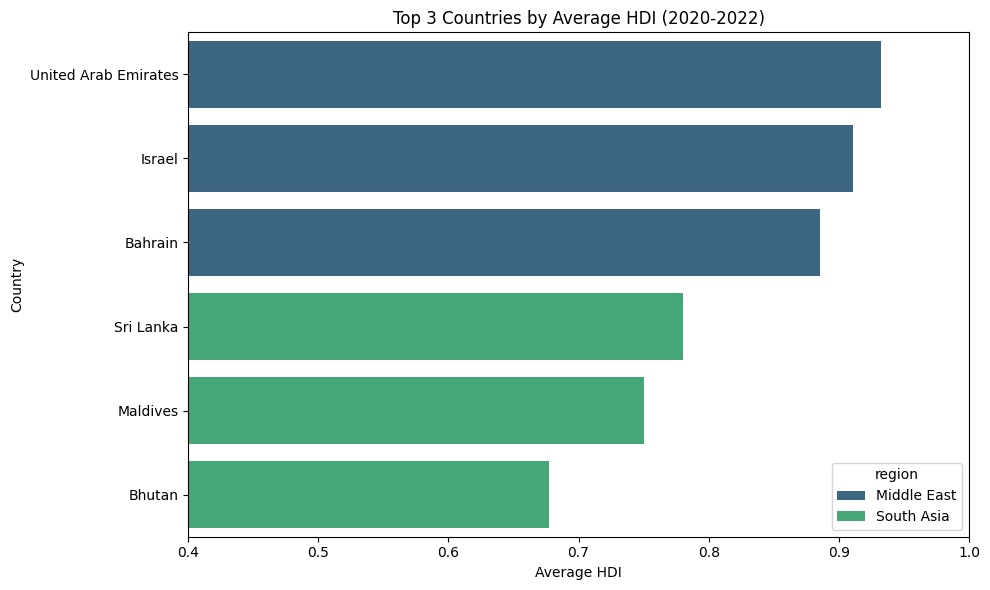

In [114]:
top_3 = pd.concat([
    sa_data.groupby('country')['hdi'].mean().nlargest(3).reset_index().assign(region='South Asia'),
    me_data.groupby('country')['hdi'].mean().nlargest(3).reset_index().assign(region='Middle East')
], ignore_index=True)

if not top_3.empty:
    top_3 = top_3.sort_values('hdi', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_3, x='hdi', y='country', hue='region', palette='viridis')
    plt.title('Top 3 Countries by Average HDI (2020-2022)')
    plt.xlabel('Average HDI')
    plt.ylabel('Country')
    plt.xlim(0.4, 1.0)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Top 3 chart (possibly missing Middle East countries)")

# Task 6: Bottom 3 Countries figure

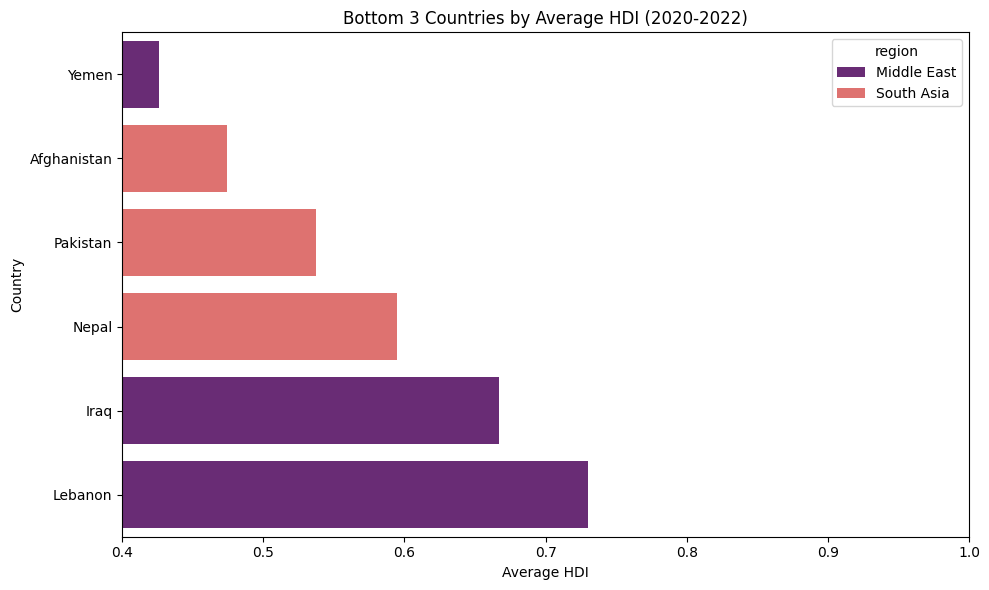

In [115]:
bottom_3 = pd.concat([
    sa_data.groupby('country')['hdi'].mean().nsmallest(3).reset_index().assign(region='South Asia'),
    me_data.groupby('country')['hdi'].mean().nsmallest(3).reset_index().assign(region='Middle East')
], ignore_index=True)

if not bottom_3.empty:
    bottom_3 = bottom_3.sort_values('hdi', ascending=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=bottom_3, x='hdi', y='country', hue='region', palette='magma')
    plt.title('Bottom 3 Countries by Average HDI (2020-2022)')
    plt.xlabel('Average HDI')
    plt.ylabel('Country')
    plt.xlim(0.4, 1.0)
    plt.tight_layout()
    plt.show()
else:
    print("No data for Bottom 3 chart")

# Task 7: Metric comparison charts

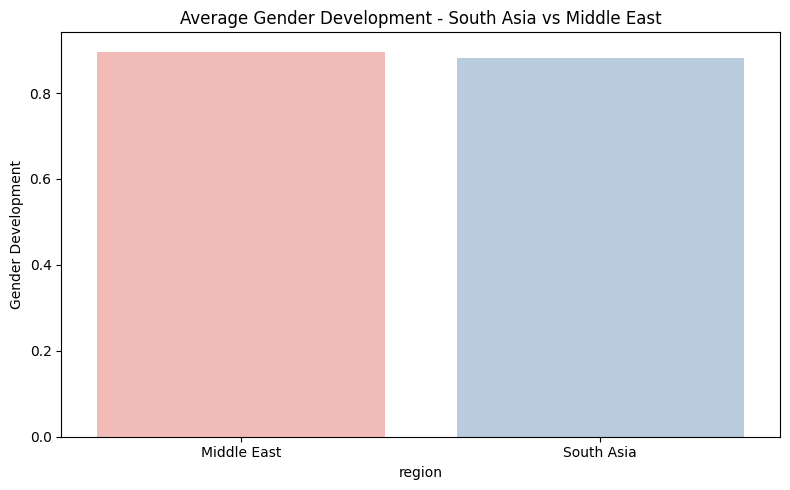

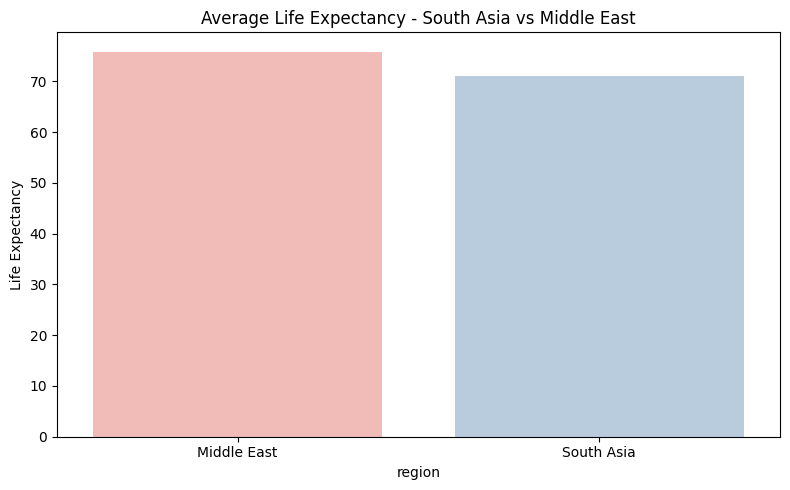

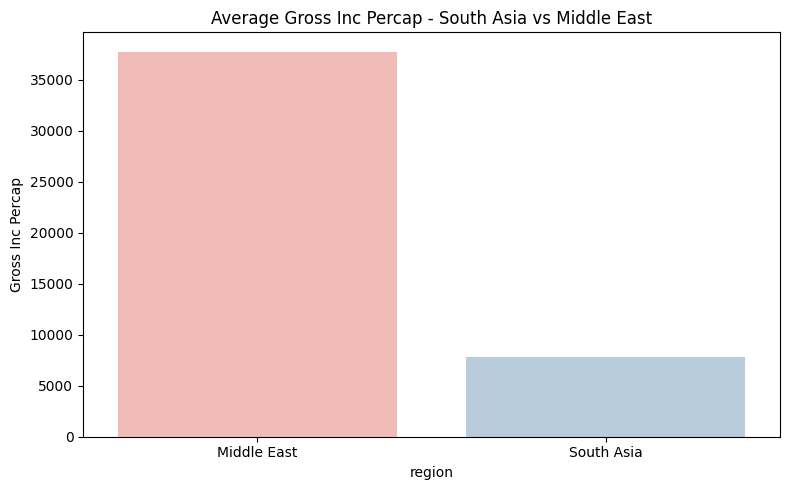

In [116]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']
for metric in metrics:
    if metric in combined.columns and not combined[metric].isna().all():
        avg = combined.groupby('region')[metric].mean().reset_index()
        plt.figure(figsize=(8, 5))
        sns.barplot(data=avg, x='region', y=metric, hue='region', palette='Pastel1', legend=False)
        plt.title(f'Average {metric.replace("_", " ").title()} - South Asia vs Middle East')
        plt.ylabel(metric.replace("_", " ").title())
        plt.tight_layout()
        plt.show()

##*- Biggest difference*

In [117]:
diffs = {}
for metric in metrics:
    if metric in combined.columns:
        sa_mean = sa_data[metric].mean()
        me_mean = me_data[metric].mean()
        if not (pd.isna(sa_mean) or pd.isna(me_mean)):
            diff = abs(sa_mean - me_mean)
            diffs[metric] = diff

if diffs:
    max_diff_metric = max(diffs, key=diffs.get)
    print(f"\nBiggest difference in: {max_diff_metric.replace('_', ' ').title()}")


Biggest difference in: Gross Inc Percap


# Task 8: HDI Disparity (Range and CV)

In [118]:
print("\nHDI Disparity:")
for name, data in [('South Asia', sa_data), ('Middle East', me_data)]:
    if data.empty:
        print(f"{name}: No data")
        continue
    range_val = data['hdi'].max() - data['hdi'].min()
    cv = (data['hdi'].std() / data['hdi'].mean()) * 100
    print(f"{name} - HDI Range: {range_val:.3f}, Coefficient of Variation (CV %): {cv:.1f}")

if not sa_data.empty and not me_data.empty:
    more_var_region = "Middle East" if (me_data['hdi'].std() / me_data['hdi'].mean()) > (sa_data['hdi'].std() / sa_data['hdi'].mean()) else "South Asia"
    print(f"\n{more_var_region} has more variation in HDI.")
elif not sa_data.empty:
    print("\nOnly South Asia has data — cannot compare variation.")


HDI Disparity:
South Asia - HDI Range: 0.321, Coefficient of Variation (CV %): 15.4
Middle East - HDI Range: 0.513, Coefficient of Variation (CV %): 17.9

Middle East has more variation in HDI.


# Task 9: Correlation plots

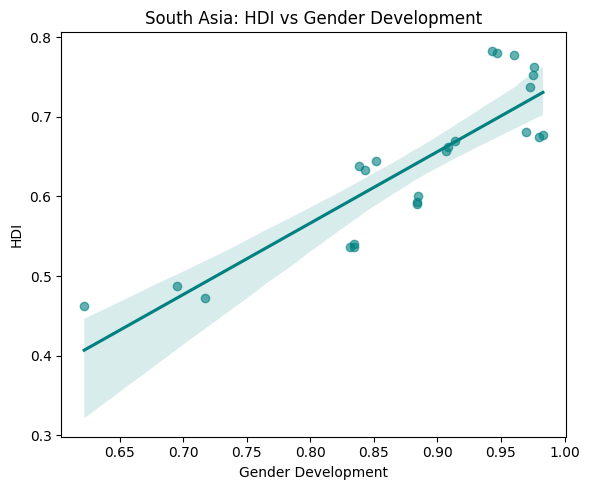

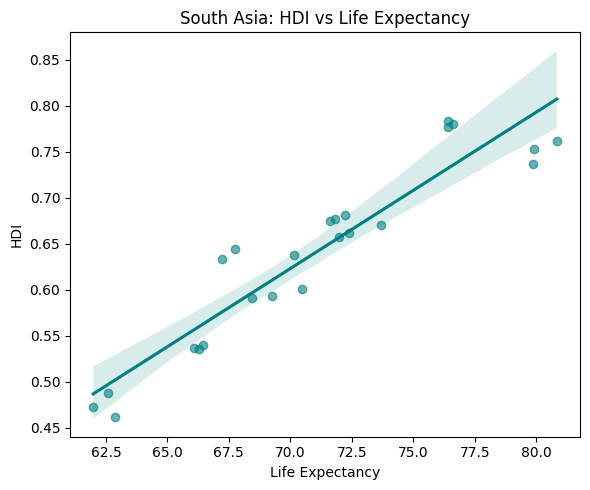

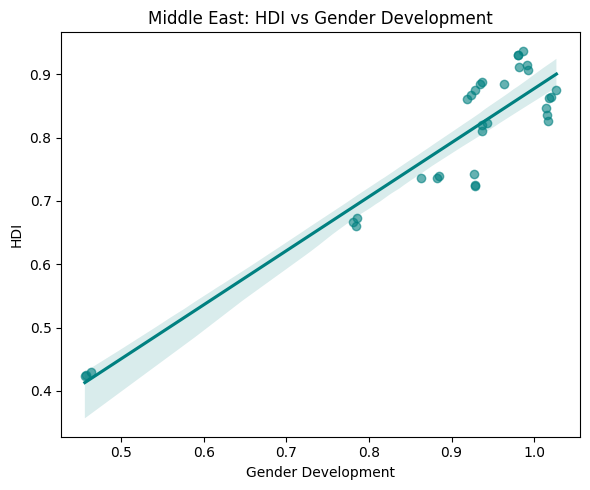

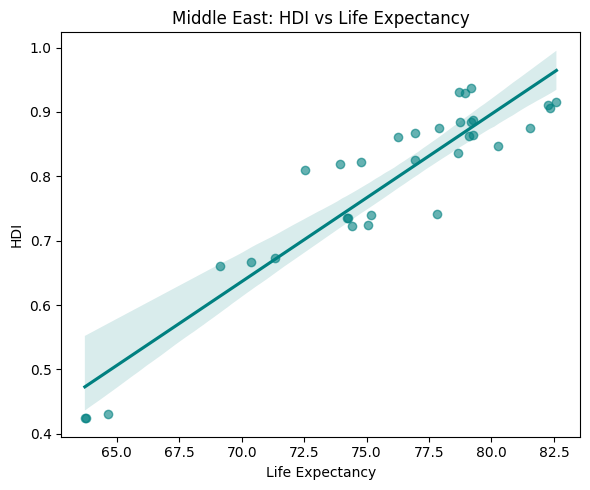

In [119]:
for name, data in [('South Asia', sa_data), ('Middle East', me_data)]:
    if data.empty:
        continue
    for col in ['gender_development', 'life_expectancy']:
        if col in data.columns and data[col].notna().any():
            plt.figure(figsize=(6, 5))
            sns.regplot(data=data, x=col, y='hdi', color='teal', scatter_kws={'alpha':0.6})
            plt.title(f'{name}: HDI vs {col.replace("_", " ").title()}')
            plt.xlabel(col.replace("_", " ").title())
            plt.ylabel('HDI')
            plt.tight_layout()
            plt.show()

# Task 10: Outlier detection and scatter (HDI vs GNI)

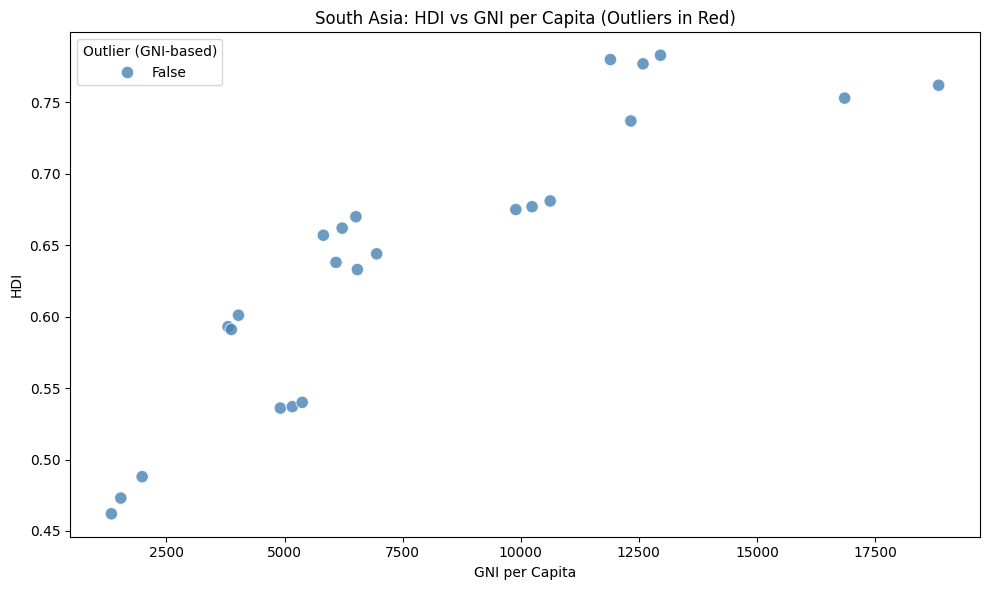

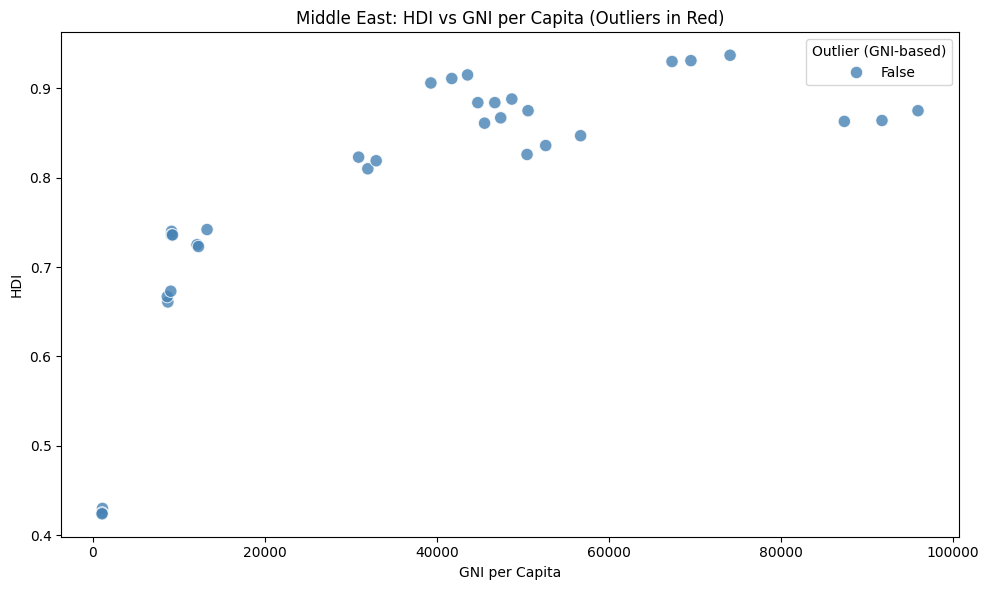

Middle East usually has higher HDI, GNI, and life expectancy due to oil economies.
South Asia has lower values but more consistent development.


In [120]:
for name, data in [('South Asia', sa_data), ('Middle East', me_data)]:
    if data.empty or 'gross_inc_percap' not in data.columns:
        continue
    temp_data = data.copy()
    Q1 = temp_data['gross_inc_percap'].quantile(0.25)
    Q3 = temp_data['gross_inc_percap'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    temp_data['outlier'] = (temp_data['gross_inc_percap'] < lower) | (temp_data['gross_inc_percap'] > upper)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=temp_data, x='gross_inc_percap', y='hdi', hue='outlier',
                    palette={False: 'steelblue', True: 'red'}, alpha=0.8, s=80)
    plt.title(f'{name}: HDI vs GNI per Capita (Outliers in Red)')
    plt.xlabel('GNI per Capita')
    plt.ylabel('HDI')
    plt.legend(title='Outlier (GNI-based)')
    plt.tight_layout()
    plt.show()

print("Middle East usually has higher HDI, GNI, and life expectancy due to oil economies.")
print("South Asia has lower values but more consistent development.")